In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from csv import DictReader
from sklearn.linear_model import LinearRegression

In [3]:
#Pridobivanje podatkov
musics = []

reader = DictReader(open('tcc_ceds_music.csv', 'rt', encoding='utf-8'))
for row in reader:
    artist = row["artist_name"]
    name   = row["track_name"]
    genre  = row["genre"]
    length = row["len"]
    topic  = row["topic"]
    sadness= row["sadness"]
    danceability= row["danceability"]
    energy= row["energy"]
    date = row["release_date"]
    musics.append([artist, name, date, genre, length, topic, sadness,danceability,energy])
    

In [4]:
ganerByYear = {}

for i in musics:
    if ( i[3] not in ganerByYear.keys() ): 
        ganerByYear[i[3]] = {}
        ganerByYear[i[3]][i[2]] = 1
    else: 
        if ( i[2] not in ganerByYear[i[3]].keys() ) : 
            ganerByYear[i[3]][i[2]] = 1
        else:
            ganerByYear[i[3]][i[2]] += 1

Text(0.5, 0, 'Število glasb')

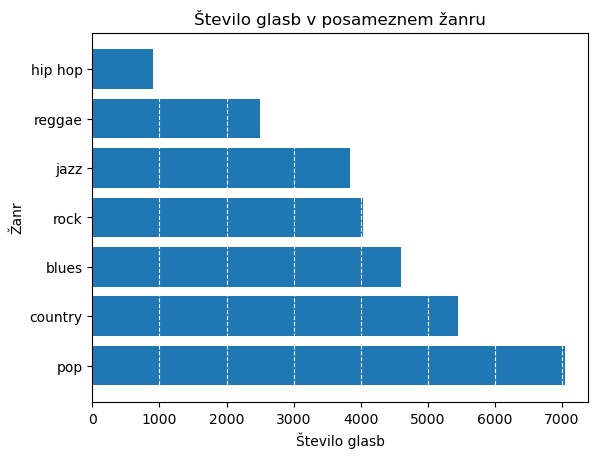

In [5]:
fig, ax = plt.subplots(1, 1)

temp = {}
for music in musics:
    if music[3] not in temp.keys():
        temp[music[3]] = 0
    temp[music[3]] += 1

temp = sorted(temp.items(), key=lambda x:x[1], reverse=True)
temp = dict(temp)

ax.xaxis.grid(color='white', linestyle='dashed')
ax.set_title("Število glasb v posameznem žanru")
ax.barh(list(temp.keys()), temp.values())
ax.set_ylabel("Žanr")
ax.set_xlabel("Število glasb")

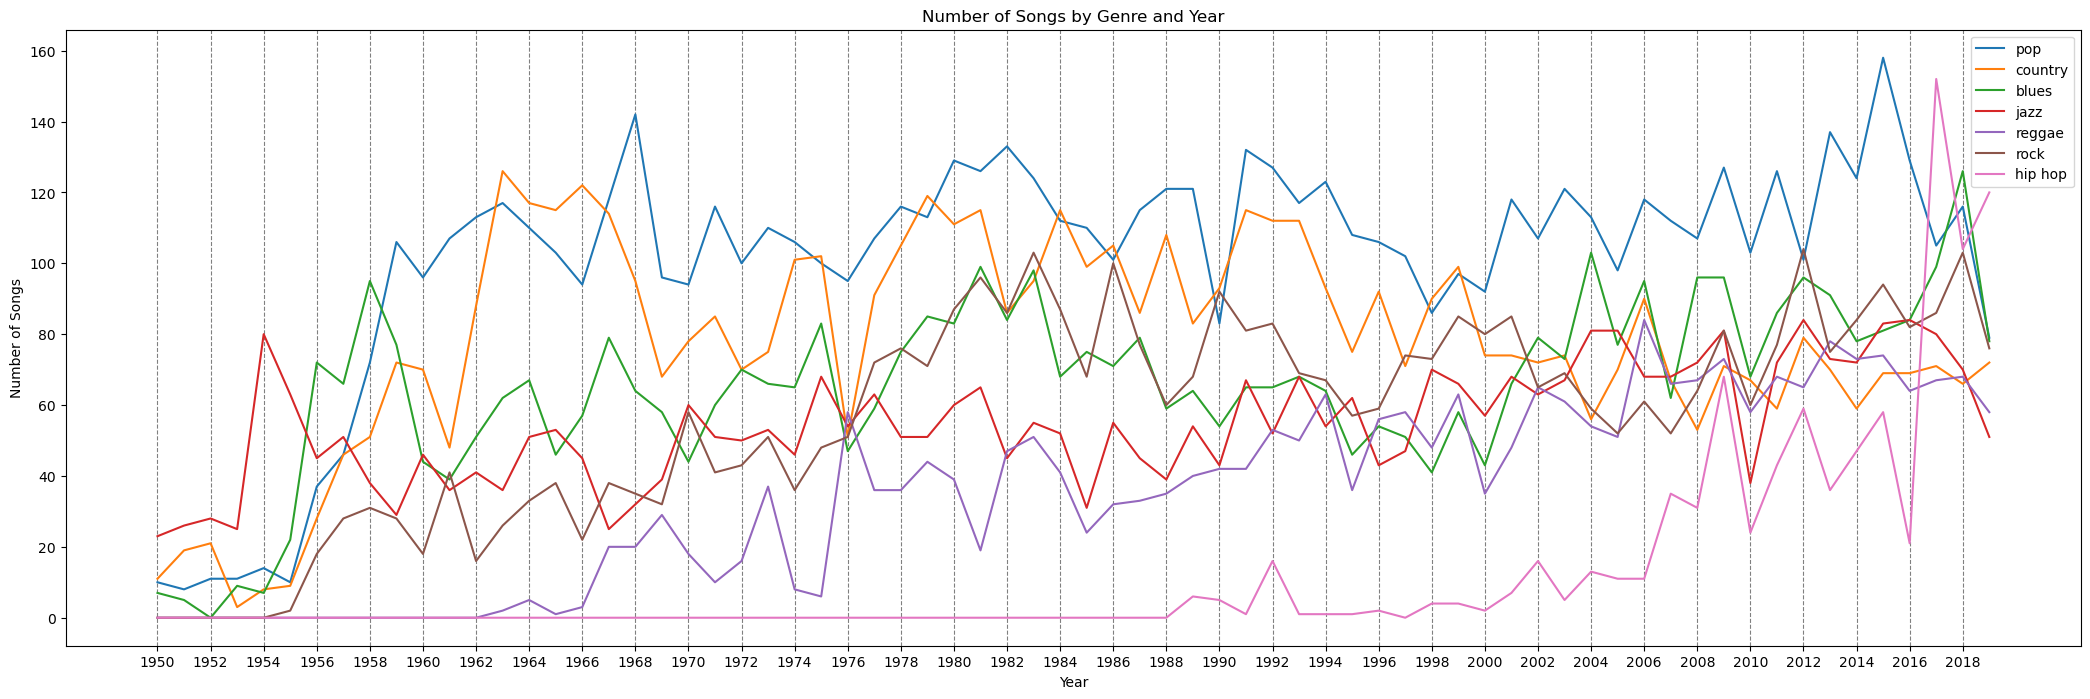

In [6]:
genres = list(ganerByYear.keys())
years = sorted(list(set(year for genre in ganerByYear.values() for year in genre.keys())))


# Plotting
fig, ax = plt.subplots(figsize=(26, 8))

for genre in genres:
    song_counts = [ganerByYear[genre].get(year, 0) for year in years]
    ax.plot(years, song_counts, label=genre)

ax.xaxis.grid(color='grey', linestyle='dashed')
plt.xticks(np.arange(0, 70, 2))
ax.set_xlabel('Leto')
ax.set_ylabel('Število glasb')
ax.set_title('Razviajnje zvrsti skozi leta')
ax.legend()

plt.show()

Kot lahko vidimo iz zgornjega grafa imamo kar nekaj zanimijh dogodkov. Spodaj bom naštel nekaj od teh.
* Prvi večji uspon pop-a leta 1968 in hkratti padec prej najbolj popularne country glasbe
* reggae keta 1976 velik uspon in hkrati tudi padec drugih zvrst kot je country, blues, itd.
* 1990 vzpon rock-a in hud padaec pop-a
* Kot lahko vidimo se je izdaja country glasbe po letu 2000 krepko upadla 
* Padec vseh zvrsti leta 1995 in 2010
* V zasdnjih letih pa prevzema glavno blogo hip hop in izpodriva pop